# Autoencoders on Handwritten Digit's Data


* Importing the Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

* Importing the Dataset

In [10]:
(x_train,_),(x_test,_)=mnist.load_data()

In [11]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

* Scaling

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
x_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

* Reshaping the Matrix

In [16]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [17]:
x_train.shape

(60000, 784)

* Data Visualization

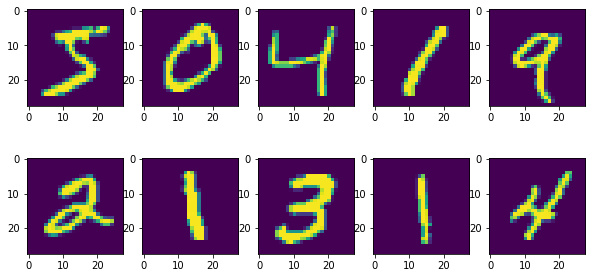

In [23]:
plt.figure(figsize=(10,5))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)